In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import plotly.graph_objects as go
%matplotlib inline

In [4]:
df = pd.read_csv('../test_data/sparse_test.txt',header=None)

In [13]:
df=df.rename({0:'iter',1:'sweep'},axis=1)

In [16]:
df=df.drop(9,axis=1)

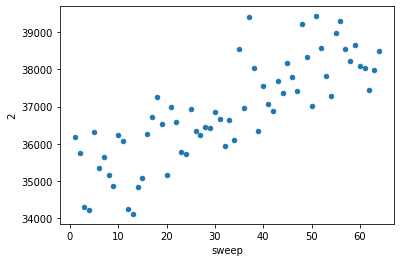

In [21]:
# df.loc[df.iter==0].plot.scatter(x='sweep',y=)

In [18]:
sparse_1 = np.load("sparse_1.npz")
sparse_2 = np.load("sparse_2.npz")

In [19]:
# Print files in sparse_1
sparse_1.files

['sensor_config_dump',
 'module_key',
 'processing_config_dump',
 'rss_version',
 'lib_version',
 'timestamp',
 'mode',
 'session_info',
 'data',
 'data_info']

In [20]:
data = sparse_1['data']
data.shape
data[0][0]
#(# of data frames,# of amplitude, # of sweeps, # of depth recordings) ??? not sure if this is right

array([[32635.59921161, 32790.11992663, 32841.09395385, 32672.12562197,
        32810.802092  , 32721.76435074, 32748.52606602, 34530.90987732,
        36831.2396657 , 32415.87339644, 30676.95738281, 32560.35515033,
        32944.6843191 , 32696.380513  , 32806.34831351, 32827.85836928,
        32642.11675141, 32805.67584384],
       [32779.86194284, 32807.01289149, 32788.50734721, 32752.46249336,
        32805.03929932, 32594.9967967 , 32664.2971388 , 34692.9842016 ,
        36698.9871391 , 32666.37736207, 30752.25240067, 32477.79058118,
        32616.27993009, 32749.28038307, 32794.22530536, 32998.57955082,
        32732.86783538, 32708.56869537],
       [32675.53914827, 32692.22864474, 32952.99961427, 32874.10103615,
        32799.72981103, 32653.76186255, 32439.89860349, 34560.9944756 ,
        36766.7105897 , 32413.77795634, 30720.5828458 , 32392.02304785,
        32958.05382868, 32855.66961558, 32896.2002732 , 32642.06855281,
        32696.13452922, 32601.22569729],
       [32660

Text(0.5, 1.0, 'Amplitude vs. Depth for Data Frame n = 25')

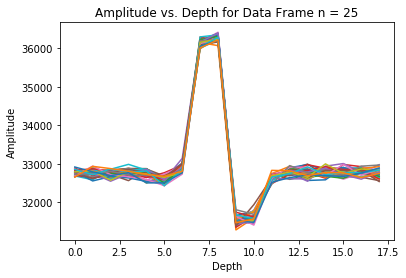

In [13]:
# Plot the n-th data frame: go through each sweep, which corresponds to the colors,
# and plot the amplitude at particular depths
n = 25
for i in range(data.shape[2]):
    plt.plot(data[n, 0, i, :])
    
plt.xlabel("Depth")
plt.ylabel("Amplitude")
plt.title("Amplitude vs. Depth for Data Frame n = " + str(n))

In [14]:
fig = go.Figure()

n = 25
for i in range(data.shape[2]):
    fig.add_trace(go.Scatter(x=list(range(len(data[n, 0, i, :]))),y=data[n, 0, i, :],name=str(i)))

fig.update_layout(title='Amplitude vs. Depth')
fig.show()

NameError: name 'go' is not defined

Text(0.5, 1.0, 'Amplitude vs. Time for Wavelets at Data Frame n = 25')

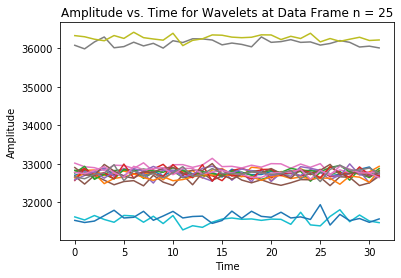

In [15]:
# Plot undersampled (due to sparse sampling) wavelets at each depth, where depths are represented by colors
n = 25
for i in range(data.shape[3]):
    plt.plot(data[n, 0, :, i])
    
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Amplitude vs. Time for Wavelets at Data Frame n = " + str(n))

In [16]:
fig = go.Figure()

n = 25
for i in range(data.shape[3]):
    fig.add_trace(go.Scatter(x=list(range(len(data[n, 0, :, i]))),y=data[n, 0, :, i],name=str(i)))

fig.update_layout(title='Amplitude vs. Time for Wavelets')
fig.show()

NameError: name 'go' is not defined

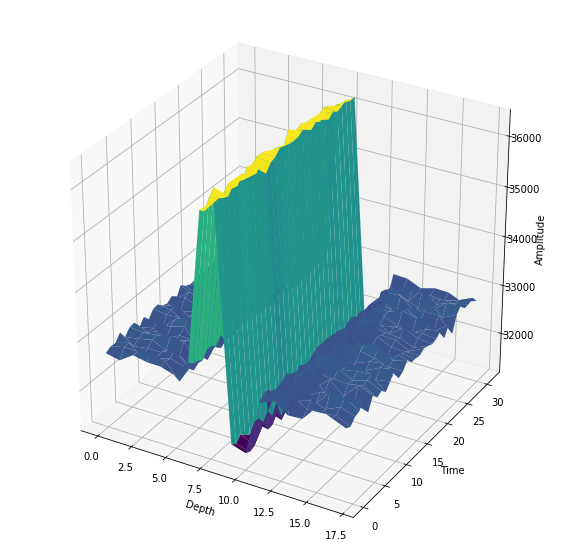

In [9]:
# 3D Plot of the above 2 plots
n = 25
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create X and Y Axes
X = np.arange(0, 18) # Depths    TODO: Figure out units / correct values
Y = np.arange(0, 32) # Times     TODO: Figure out units / correct values
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, data[n, 0, :, :],cmap='viridis', edgecolor='none')

ax.set_xlabel('Depth')
ax.set_ylabel('Time')
ax.set_zlabel('Amplitude')
fig.set_size_inches(10, 10)

plt.show()

In [19]:
fig = go.Figure(data=[go.Surface(z=data[n, 0, :, :],colorscale='viridis')])
fig.update_layout(scene = dict(
                    xaxis_title='Depth',
                    yaxis_title='Time',
                    zaxis_title='Amplitude'))